In [20]:
# import manipulation libraries
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='supplychain.log',
                    force=True)

# import warning libraries
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict

In [21]:
def data_ingestion():
    filename = r'C:/EnergyConsumption_Model/data/raw/Energy_consumption.csv'
    try:
        df = pd.read_csv(filename)
        logging.info("dataset successfully loaded")

    except:
        logging.info("check file path") 

    return df  

In [22]:
# data exploration
def data_exploration(df):
    
    #segregate numerical and categorical columns
    numerical_col = df.select_dtypes(exclude = 'object').columns
    categorical_col = df.select_dtypes(include = 'object').columns


    #numerical stats
    numerical_stats = []

    Q1 = df[numerical_col].quantile(0.25)
    Q3 = df[numerical_col].quantile(0.75)   
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    outliter_count = ((df[numerical_col] < LW) | (df[numerical_col] > UW))
    
    for i in numerical_col:
        num_stats = OrderedDict({
            "feature": i,
            "mean": df[i].mean(),
            "median": df[i].median(),
            "quartile_1": Q1[i],
            "quartile_3": Q3[i],
            "IQR": IQR[i],
            "lower_whisker": LW[i],
            "upper_whisker": UW[i],
            "outlier_count": outliter_count[i].sum(),
            "std_dev": df[i].std(),
            "variance": df[i].var(),
            "skewness": df[i].skew(),
            "kurtosis": df[i].kurtosis()
        })

    return numerical_stats
    numerical_stats.append(numerical_stats)
    numerical_stats_report =  numerical_stats(df)  
    
    

In [23]:
# step 3: data information

def data_info(df):
    print(df.info())

In [24]:
df = data_ingestion()
numerical_stats_report = data_exploration(df)
info = data_info(df)

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   str    
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   str    
 6   LightingUsage      1000 non-null   str    
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   str    
 9   Holiday            1000 non-null   str    
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), str(5)
memory usage: 86.1 KB
None


In [25]:
# data cleaning 

# check duplicate data 
df.duplicated().sum()

np.int64(0)

In [26]:
# check null values 
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [27]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='str')

In [28]:
# data preprocessing
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df["month"] = df["Timestamp"].dt.month
df["day"] = df["Timestamp"].dt.day
df["hour"] = df["Timestamp"].dt.hour


In [29]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption', 'month', 'day', 'hour'],
      dtype='str')

In [47]:
df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption', 'month', 'day', 'hour'],
      dtype='str')

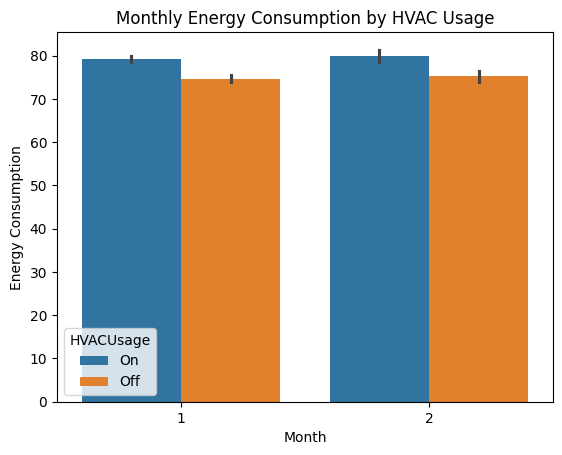

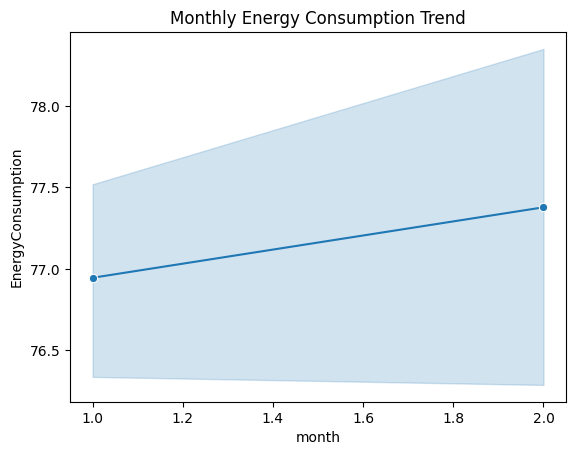

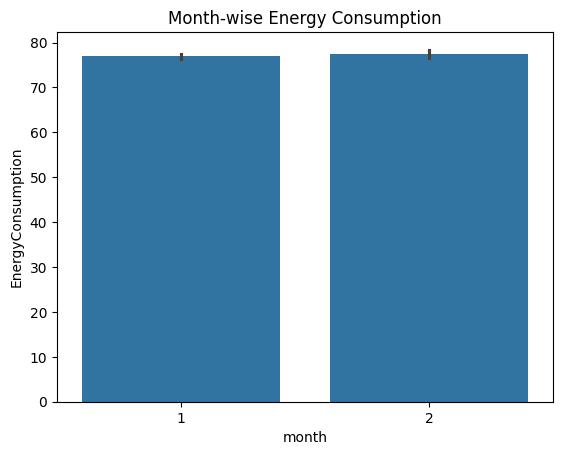

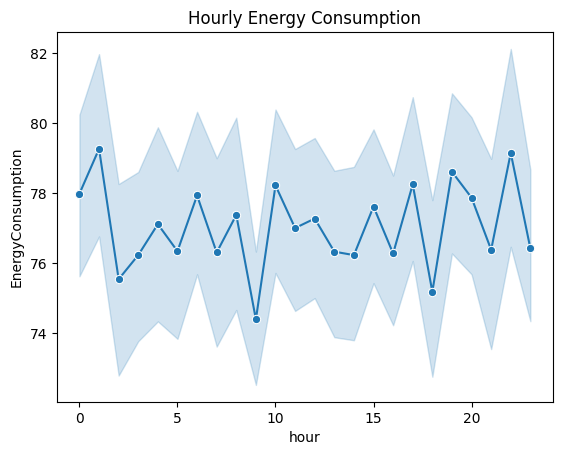

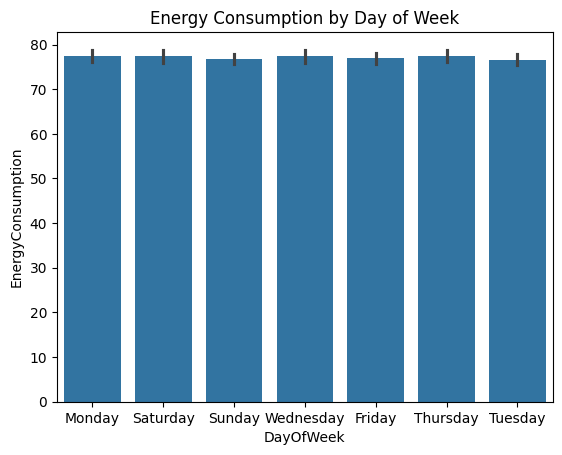

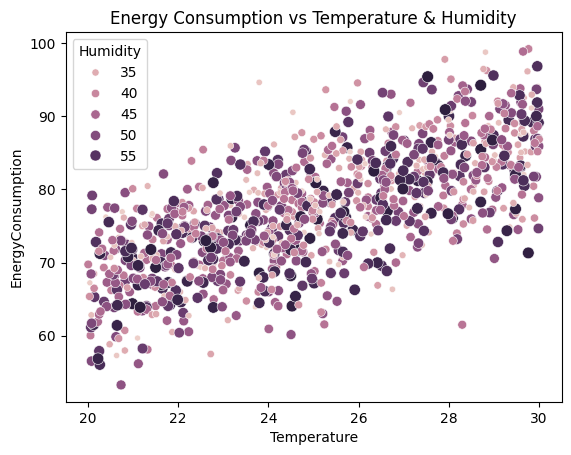

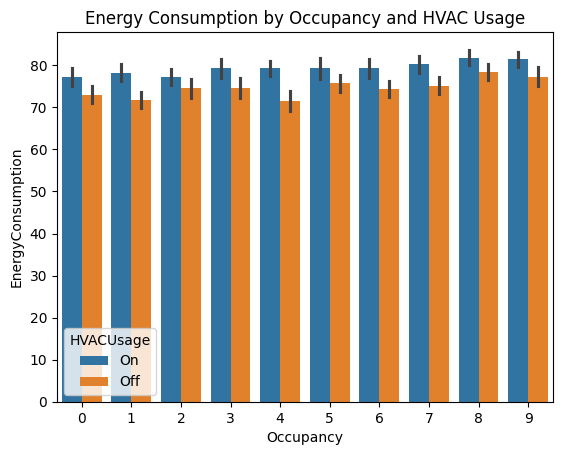

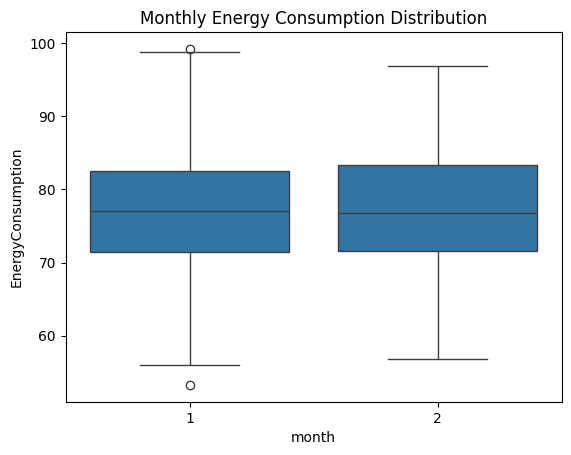

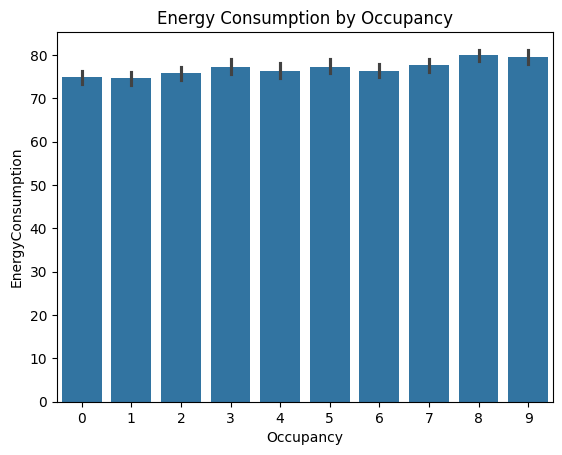

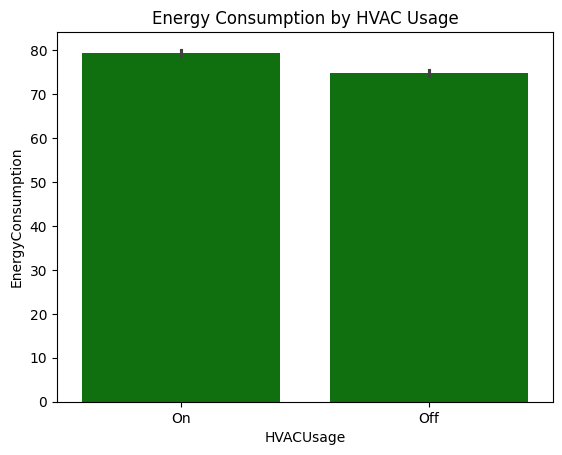

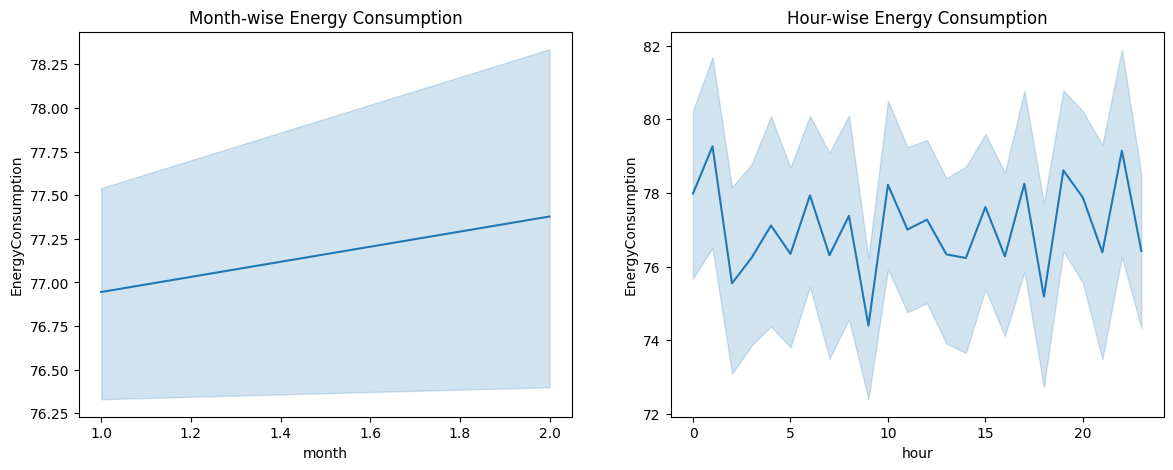

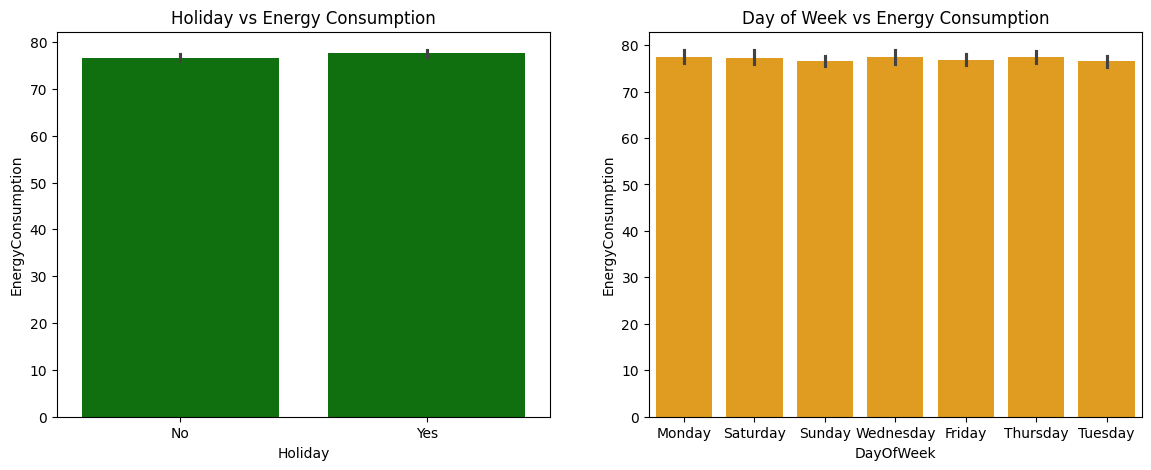

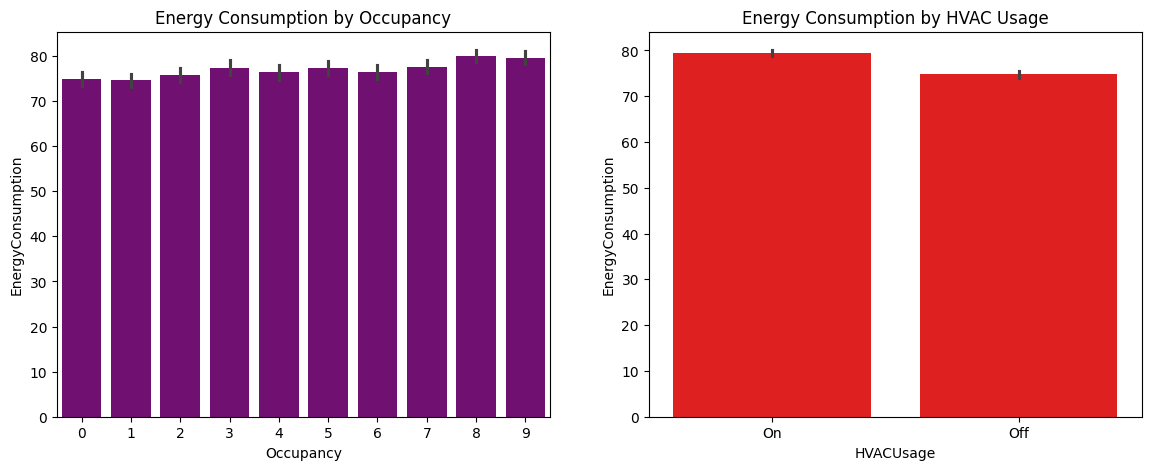

In [87]:
def generate_reports(df):

    reports = {}

sns.barplot(
    data=df,
    x='month',
    y='EnergyConsumption',
    hue='HVACUsage'
)

plt.title('Monthly Energy Consumption by HVAC Usage')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.show()


sns.lineplot(
    data=df,
    x='month',
    y='EnergyConsumption',
    marker='o'
)

plt.title('Monthly Energy Consumption Trend')
plt.show()


sns.barplot(data=df, x='month', y='EnergyConsumption')
plt.title('Month-wise Energy Consumption')
plt.show()


sns.lineplot(data=df, x='hour', y='EnergyConsumption', marker='o')
plt.title('Hourly Energy Consumption')
plt.show()


sns.barplot(data=df, x='DayOfWeek', y='EnergyConsumption')
plt.title('Energy Consumption by Day of Week')
plt.show()


sns.scatterplot(
    data=df,
    x='Temperature',
    y='EnergyConsumption',
    size='Humidity',
    hue='Humidity'
)
plt.title('Energy Consumption vs Temperature & Humidity')
plt.show()


sns.barplot(
    data=df,
    x='Occupancy',
    y='EnergyConsumption',
    hue='HVACUsage'
)
plt.title('Energy Consumption by Occupancy and HVAC Usage')
plt.show()



sns.boxplot(data=df, x='month', y='EnergyConsumption')
plt.title('Monthly Energy Consumption Distribution')
plt.show()



sns.barplot(data=df, x='Occupancy', y='EnergyConsumption')
plt.title('Energy Consumption by Occupancy')
plt.show()



sns.barplot(data=df, x='HVACUsage', y='EnergyConsumption',color='green')
plt.title('Energy Consumption by HVAC Usage')
plt.show()



fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.lineplot(data=df, x='month', y='EnergyConsumption', ax=ax[0])
ax[0].set_title('Month-wise Energy Consumption')

sns.lineplot(data=df, x='hour', y='EnergyConsumption', ax=ax[1])
ax[1].set_title('Hour-wise Energy Consumption')

plt.show()




fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(data=df, x='Holiday', y='EnergyConsumption', ax=ax[0],color='green')
ax[0].set_title('Holiday vs Energy Consumption')

sns.barplot(data=df, x='DayOfWeek', y='EnergyConsumption', ax=ax[1],color='orange')
ax[1].set_title('Day of Week vs Energy Consumption')

plt.show()



fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(data=df, x='Occupancy', y='EnergyConsumption', ax=ax[0],color='purple')
ax[0].set_title('Energy Consumption by Occupancy')

sns.barplot(data=df, x='HVACUsage', y='EnergyConsumption', ax=ax[1],color='red')
ax[1].set_title('Energy Consumption by HVAC Usage')

plt.show()




    